# Trajectories of a charged particle in a magnetic field


This example illustrates how to simulate the propagation of a charged particle in a magnetised environment.
Two examples are presented, one for a simple homogeneous case, and another for a turbulent magnetic field.

## Homogeneous magnetic field

The first example describes how to perform the simulation considering a simple homogeneous magnetic field.

### Assembling the simulation

Here the candidate is explicitly initialised. The alternative would be to set its initial properties using the features of the `Source` class, as done in other examples. 

In [6]:
from crpropa import *

# define field of strength 0.1 nT
magneticField = UniformMagneticField(Vector3d(0., 0., 1e-10))

# initial state of particle
position = Vector3d(0, 0, 0)
direction = Vector3d(1, 1, 0.01)
energy = 1e16 * eV
particleType = nucleusId(1, 1)
candidate = Candidate(particleType, energy, position, direction)

# type of propagator (take into account magnetic deflections)
propagator = PropagationBP(magneticField)

# break conditions
breakTrajectory = MaximumTrajectoryLength(1 * Mpc)

# output file to store trajectory
outputType = Output.Trajectory3D
outputFile1 = 'sim/01-homogeneous.txt'
output = TextOutput(outputFile1, outputType)


# define simulation setup
sim = ModuleList()
sim.add(propagator)
sim.add(breakTrajectory)
sim.add(output)
sim.run(candidate, True)

output.close()

### Plotting

Now we plot the results.
The positions of the particle at different times is indicated by the color scale (black earlier times, white later times).
The initial position of the candidate is shown in blue, whereas its final position is shown in green.

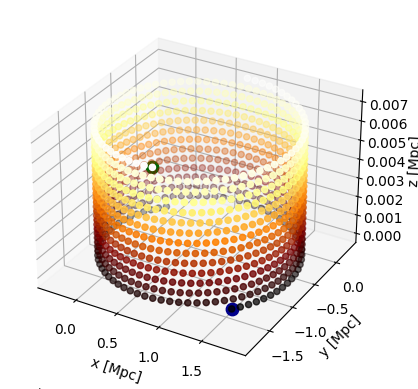

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(outputFile1, names = True)

# create canvas for plotting
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
# ax.view_init(30, -260)
traj = ax.scatter(data['X'], data['Y'], data['Z'], c = data['D'], cmap = 'afmhot')
pos_i = ax.scatter(data['X'][ 0], data['Y'][ 0], data['Z'][ 0], c = 'darkblue', s = 80)
pos_f = ax.scatter(data['X'][-1], data['Y'][-1], data['Z'][-1], c = 'darkgreen', s = 80)


## Turbulent magnetic field

In this second example a turbulent magnetic field is generated and the propagation of a proton is studied.
The mechanism for generation of this field is described in the lecture notes. It involves performing Fourier transforms of a zero-mean Gaussian random field with a given spectrum. Here the case of a Kolmogorov case is considered.

### Assembling the simulation

The simulation is assembled almost exactly like in the homogeneous case.
The only change is the magnetic field.
Note that a grid has to be provided for the calculation of this field, with a given origin, resolution, and spacing. 
The values `lMin` and `lMax` refer to the cut-offs of the magnetic power spectrum and depend on the grid properties.

In [3]:
from crpropa import *

# define field with RMS 0.1 nT
randomSeed = 42 # to ensure reproducibility of the simulation
Brms = 1e-10
lMin = 20 * kpc
lMax = 100 * kpc
sIndex = 5. / 3. # Kolmogorov turbulence
turbulentSpectrum = SimpleTurbulenceSpectrum(Brms, lMin, lMax, sIndex)
gridProperties = GridProperties(Vector3d(0., 0., 0.), 128, 10 * kpc)
magneticField = SimpleGridTurbulence(turbulentSpectrum, gridProperties, randomSeed)

# initial state of particle
position = Vector3d(0, 0, 0)
direction = Vector3d(1, 1, 0.01)
energy = 1e19 * eV
particleType = nucleusId(1, 1)
candidate = Candidate(particleType, energy, position, direction)

# type of propagator (take into account magnetic deflections)
propagator = PropagationBP(magneticField)

# break conditions
breakTrajectory = MaximumTrajectoryLength(1 * Mpc)

# output file to store trajectory
outputType = Output.Trajectory3D
outputFile2 = 'sim/01-turbulent.txt'
output = TextOutput(outputFile2, outputType)


# define simulation setup
sim = ModuleList()
sim.add(propagator)
sim.add(breakTrajectory)
sim.add(output)
sim.run(candidate, True)

output.close()

### Plotting

Now we plot the trajectory of this one particle.
The positions of the particle at different moments in time is shown. Darker shades are earlier times (close to emission).


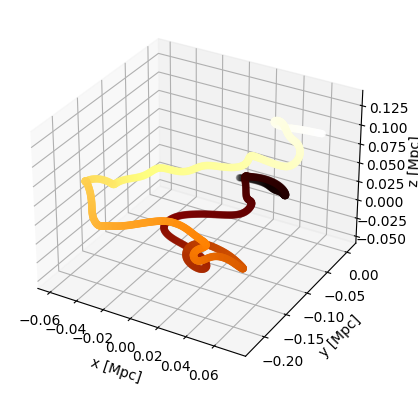

In [8]:
data = np.genfromtxt(outputFile2, names = True)

# create canvas for plotting
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
traj = ax.scatter(data['X'], data['Y'], data['Z'], c = data['D'], cmap = 'afmhot')
